### Iterate through each sound manually
We patch ALWELG.MAC to play each sound we're interested in as the '3 sec warning'.
Then we record it in raw format

```diff
diff --git a/src/ALWELG.MAC b/src/ALWELG.MAC
index efedb86..d432769 100644
--- a/src/ALWELG.MAC
+++ b/src/ALWELG.MAC
@@ -214,7 +214,7 @@ PRORAT:                             ;UPDATE TIMER
        ENDIF
        CMP I,3
        IFEQ
-       JSR S3SWAR              ;3 SECONDS WARNING
+       JSR CPEXPL              ;3 SECONDS WARNING^M
        ENDIF
        LDA I,SECOND            ;RESTART FRACTIONAL SECONDS TIMER
        STA TIMHIS

```

In [68]:
!parec -d bluez_sink.F0_EF_86_C3_50_D8.a2dp_sink.monitor --file-format=raw samples/UNUSE2.raw

^C


In [67]:
!play -t raw -r 44k -e signed-integer -b 16 -c 2 samples/UNUSE2.raw

play WARN alsa: can't encode 0-bit Unknown or not applicable

samples/UNUSE1.raw:

 File Size: 328k      Bit Rate: 1.41M
  Encoding: Signed PCM    
  Channels: 2 @ 16-bit   
Samplerate: 44000Hz      
Replaygain: off         
  Duration: 00:00:01.86  

In:100%  00:00:01.86 [00:00:00.00] Out:81.9k [      |      ] Hd:0.0 Clip:0    
Done.


### Play the two unused sounds
We need to do more patching to play the two unused sounds defined at T51F and T52F.

```diff
diff --git a/src/ALSOUN.MAC b/src/ALSOUN.MAC
index 31ffd66..10debf9 100644
--- a/src/ALSOUN.MAC
+++ b/src/ALSOUN.MAC
@@ -98,6 +98,8 @@ PNTRS:
        OFFSET SL               ;SLAM
        OFFSET S3               ;3 SECONDS LEFT WARNING
        OFFSET PO               ;PULSAR OFF
+       OFFSET UN               ;PULSAR OFF^M
+       OFFSET UP               ;PULSAR OFF^M
 PTLEN  =.-PNTRS
 ;AUDIO CONTROL CHANNEL VALUE (1 BYTE PRE SOUND NUMBER)
 AUDCV  =00
@@ -129,13 +131,13 @@ SOUND=.-6
 ;
 ;EXPLOSION SOUND
 ;
-T51F:  .BYTE 0C0,8,4,10
+UN1F:  .BYTE 0C0,8,4,10^M
        .BYTE 0,0
-T51A:  .BYTE 0A6,20,0F8,4
+UN1A:  .BYTE 0A6,20,0F8,4^M
        .BYTE 0,0
-T52F:  .BYTE 40,8,4,10
+UP2F:  .BYTE 40,8,4,10^M
        .BYTE 0,0
-T52A:  .BYTE 0A6,20,0FE,4
+UP2A:  .BYTE 0A6,20,0FE,4^M
        .BYTE 0,0
 ;LAUNCH SOUND
 LA3F:  .BYTE 10,1,7,20,0,0
@@ -259,7 +261,7 @@ S3SWAR:     LDA I,SIDS3             ;3 SECONDS WARNING
        BNE SNDON
 PULSTR:        LDA I,SIDPU             ;PULSATION
        BNE SNDON
-PULSTO:        LDA I,SIDPO             ;PULSATION OFF
+PULSTO:        LDA I,SIDUP             ;PULSATION OFF^M
        BNE SNDON
        .PAGE
        .SBTTL SOUND ROUTINE
@@ -382,4 +384,4 @@ ZPOKST::    LDX I,4                 ;STOP POKEYS
        RTS
 ^L     HLL65
        .END
diff --git a/src/ALWELG.MAC b/src/ALWELG.MAC
index efedb86..2f5f8cb 100644
--- a/src/ALWELG.MAC
+++ b/src/ALWELG.MAC
@@ -12,7 +12,7 @@
        .GLOBL SWAPEN,PLAY
        .GLOBL SLAUNC,EXSNON,ESLSON,SBOING,PRSTAR,SOUTS3,PRBOOM,INBOOM
        .GLOBL INIRAT,PRORAT,LEVEL,CCEXPL,CIEXPL,CPEXPL,IPEXPL;
-       .GLOBL SELICO,PLDROP,BONSCO,SOUTS2,SOUTS3,INICOL,S3SWAR
+       .GLOBL SELICO,PLDROP,BONSCO,SOUTS2,SOUTS3,INICOL,S3SWAR,SAUSON,SSLAMS^M
        .GLOBL PPSPXI,CPSPXI,FPSPXI,PULSTR,D70MSK,PULSTO
        .GLOBL QCHKS2,QCHKS3,QCHKS4,QCHKS5
        .ASECT
@@ -214,7 +214,7 @@ PRORAT:                             ;UPDATE TIMER
        ENDIF
        CMP I,3
        IFEQ
-       JSR S3SWAR              ;3 SECONDS WARNING
+       JSR PULSTO              ;3 SECONDS WARNING^M
        ENDIF
        LDA I,SECOND            ;RESTART FRACTIONAL SECONDS TIMER
        STA TIMHIS

```

###  Trim the samples we captured
To remove the silence before and after.

In [125]:
!ls -1 samples/

CPEXPL.raw
CPEXPL-trimmed.raw
ESLSON.raw
ESLSON-trimmed.raw
EXSNON.raw
PULSTO.raw
PULSTR.raw
S3SWAR.raw
SAUSON.raw
SBOING.raw
SELICO.raw
SLAUNC.raw
SOUTS2.raw
SOUTS3.raw
SSLAMS.raw
UNUSE1.raw
UNUSE2.raw


In [126]:
files = """CPEXPL.raw
ESLSON.raw
EXSNON.raw
PULSTO.raw
PULSTR.raw
S3SWAR.raw
SAUSON.raw
SBOING.raw
SELICO.raw
SLAUNC.raw
SOUTS2.raw
SOUTS3.raw
SSLAMS.raw
UNUSE1.raw
UNUSE2.raw""".split('\n')
files

['CPEXPL.raw',
 'ESLSON.raw',
 'EXSNON.raw',
 'PULSTO.raw',
 'PULSTR.raw',
 'S3SWAR.raw',
 'SAUSON.raw',
 'SBOING.raw',
 'SELICO.raw',
 'SLAUNC.raw',
 'SOUTS2.raw',
 'SOUTS3.raw',
 'SSLAMS.raw',
 'UNUSE1.raw',
 'UNUSE2.raw']

In [129]:
import sys
for fn in files:
    in_bytes = open(f"samples/capture/{fn}",'rb').read()
    out_file = open(f"samples/{fn}",'wb')
    for i in range(0,len(in_bytes),2):
        x1 = int.from_bytes(in_bytes[i:i+1],byteorder='big')
        x2 = in_bytes[i+1:i+2]
        if x2 == b'\x7d' and (0x85 <= x1 <= 0x87):
            continue
        out_file.write(in_bytes[i:i+2])

In [130]:
!play -t raw -r 44k -e signed-integer -b 16 -c 2 samples/SAUSON.raw

play WARN alsa: can't encode 0-bit Unknown or not applicable

samples/SAUSON.raw:

 File Size: 299k      Bit Rate: 1.41M
  Encoding: Signed PCM    
  Channels: 2 @ 16-bit   
Samplerate: 44000Hz      
Replaygain: off         
  Duration: 00:00:01.70  

In:100%  00:00:01.70 [00:00:00.00] Out:74.8k [!=====|=====!] Hd:0.1 Clip:0    
Done.


###  Create wav files from raw samples

In [132]:
import os
SMP_DIR = "samples/"
os.listdir(SMP_DIR)


['PULSTO.raw',
 '.ESLSON.raw.swp',
 'PULSTR.raw',
 'SOUTS3.raw',
 'SELICO.raw',
 'SOUTS2.raw',
 'EXSNON.raw',
 'UNUSE1.raw',
 'UNUSE2.raw',
 'SSLAMS.raw',
 'SLAUNC.raw',
 'CPEXPL.raw',
 'capture',
 '.ESLSON-trimmed.raw.swp',
 '.SBOING.raw.swp',
 'SAUSON.raw',
 'SBOING.raw',
 'ESLSON.raw',
 'S3SWAR.raw']

In [135]:
import numpy as np
from scipy.io.wavfile import write
from scipy import signal as sg
def signed(x): return (((x >> 7) * 128) ^ x) - ((x >> 7) * 128)
import wave
import os

SMP_DIR = "samples/"
wav_files = []
for fn in files:
    
    bs = open(SMP_DIR+fn,'rb').read()
    data = [signed(bs[i]) for i in range(0,len(bs))]
    scaled = np.int16(data/np.max(np.abs(data)) * 32767) 
    with wave.open(f"{SMP_DIR}/wav/{fn}.wav", "wb") as out_f:
        out_f.setnchannels(2)
        out_f.setsampwidth(4) # number of bytes
        out_f.setframerate(44000)
        out_f.writeframes(scaled)



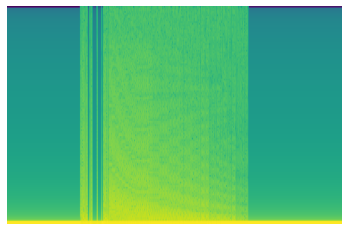

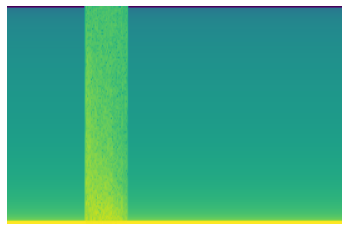

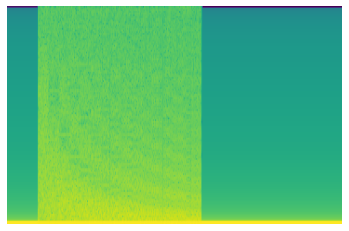

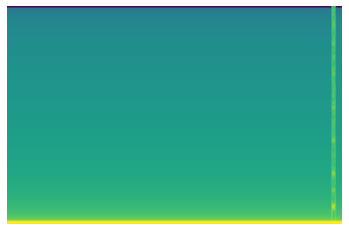

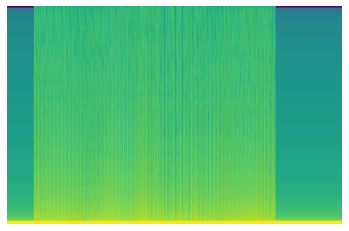

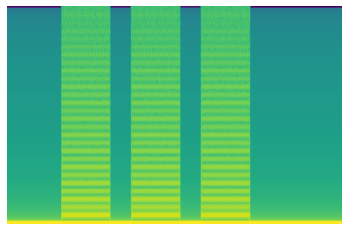

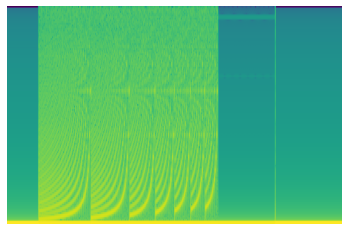

/home/robert/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


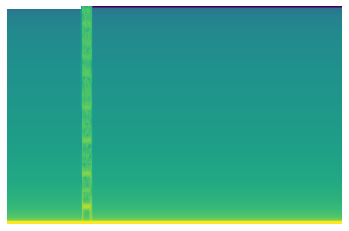

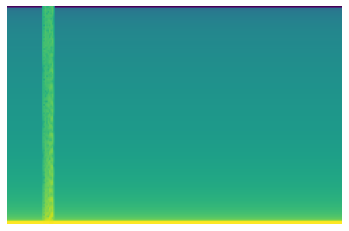

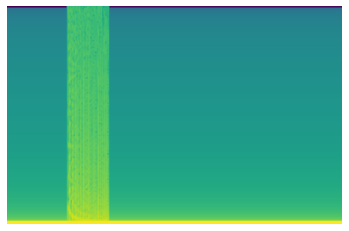

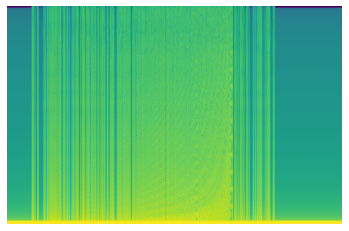

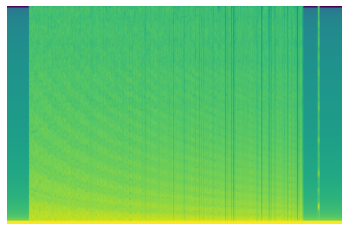

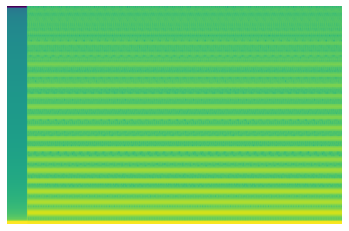

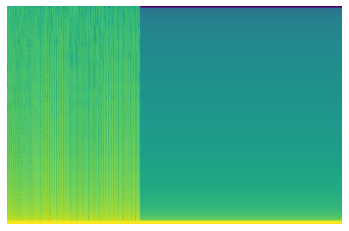

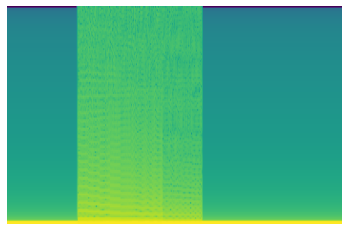

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

for fn in files:
    Fs, aud = wavfile.read(f"{SMP_DIR}/wav/{fn}.wav")
    fig, axs = plt.subplots() 
    axs.set_axis_off() 
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)
    plt.savefig(f"{SMP_DIR}spectrograms/{fn}-button.png", bbox_inches="tight")
    plt.show()
    

In [141]:
for fn in files:
    num = f'{i+1:02}'
    print(f"""    \\begin{{subfigure}}{{0.23\\textwidth}}
      \\includegraphics[width=3cm]{{tempest_sounds/buttons/{fn}-button.png}}%
      \\makebox[0pt][r]{{%
        \\raisebox{{.3cm}}{{%
          \\textattachfile{{src/tempest_sounds/wav/{fn}.wav}}{{\\includegraphics[width=1.5cm]{{sounds/play.png}}}}%
        }}\hspace*{{0.75cm}}%
      }}%
      \\caption*{{{fn.split('.')[0]}}}
    \\end{{subfigure}}""")

    \begin{subfigure}{0.23\textwidth}
      \includegraphics[width=3cm]{tempest_sounds/buttons/CPEXPL.raw-button.png}%
      \makebox[0pt][r]{%
        \raisebox{.3cm}{%
          \textattachfile{src/tempest_sounds/wav/CPEXPL.raw.wav}{\includegraphics[width=1.5cm]{sounds/play.png}}%
        }\hspace*{0.75cm}%
      }%
      \caption*{CPEXPL}
    \end{subfigure}
    \begin{subfigure}{0.23\textwidth}
      \includegraphics[width=3cm]{tempest_sounds/buttons/ESLSON.raw-button.png}%
      \makebox[0pt][r]{%
        \raisebox{.3cm}{%
          \textattachfile{src/tempest_sounds/wav/ESLSON.raw.wav}{\includegraphics[width=1.5cm]{sounds/play.png}}%
        }\hspace*{0.75cm}%
      }%
      \caption*{ESLSON}
    \end{subfigure}
    \begin{subfigure}{0.23\textwidth}
      \includegraphics[width=3cm]{tempest_sounds/buttons/EXSNON.raw-button.png}%
      \makebox[0pt][r]{%
        \raisebox{.3cm}{%
          \textattachfile{src/tempest_sounds/wav/EXSNON.raw.wav}{\includegraphics[width=1.5cm]{sounds/